In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['font.size'] = 22

import pandas as pd

import pymc3 as pm

In [3]:
import pymc3 as pm

# observations [lions, tigers, bears]
c = [3, 2, 1]

# hyperparameters (priors)
alphas = np.array([1 / 3, 1 / 3, 1 / 3])

with pm.Model() as model:
    # Probabilities for each species
    parameters = pm.Dirichlet('parameters', a=alphas, shape=3)
    # Observed data is a multinomial distribution with 6 trials
    observed_data = pm.Multinomial(
        'observed_data', n=6, p=parameters, shape=3, observed=c)

    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [posterior]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1490.91draws/s]


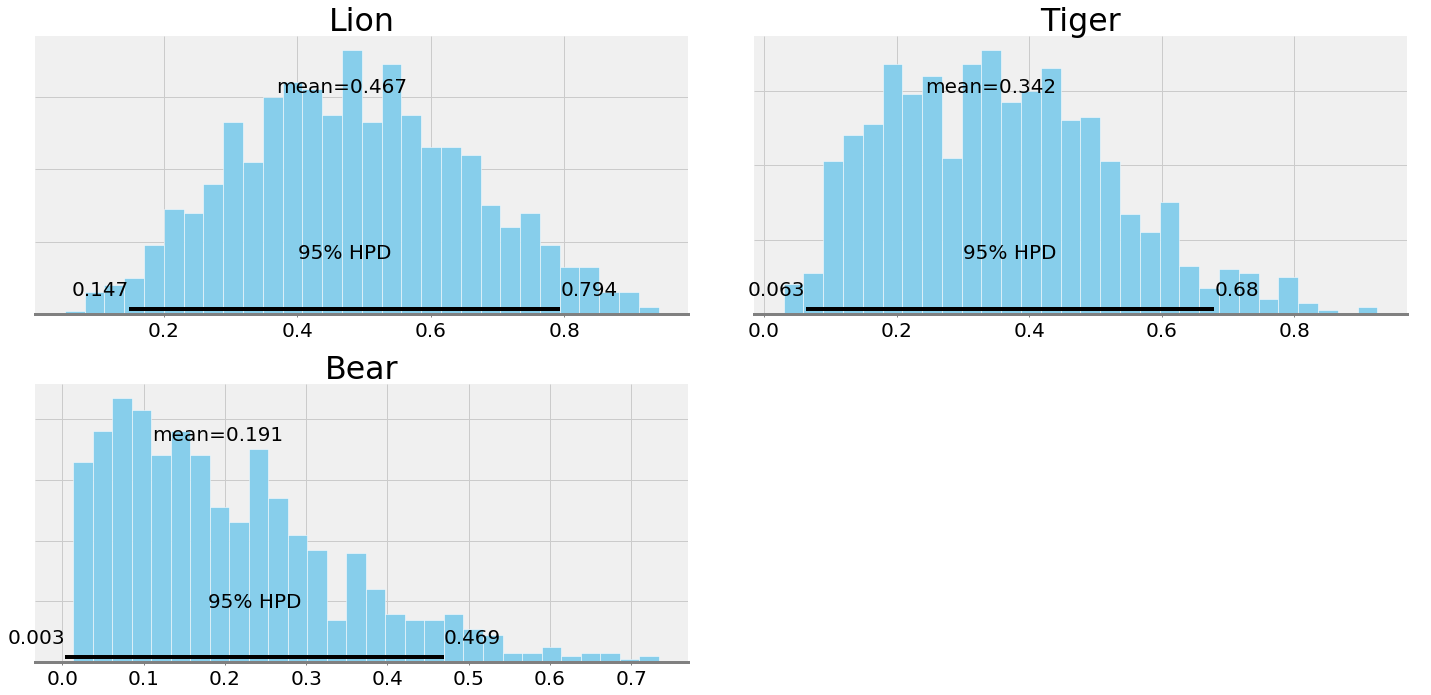

In [53]:
ax = pm.plot_posterior(trace, varnames = ['posterior'], figsize = (20, 10));
for i, a in enumerate(['Lion', 'Tiger', 'Bear']):
    ax[i].set_title(a);

In [85]:
means = trace['posterior'].mean(axis = 0)
names = ['Lions', 'Tigers', 'Bears']
mean_dict = {f'posterior_{i}': mean for i, mean in enumerate(means)}

AttributeError: 'TensorVariable' object has no attribute 'logp'

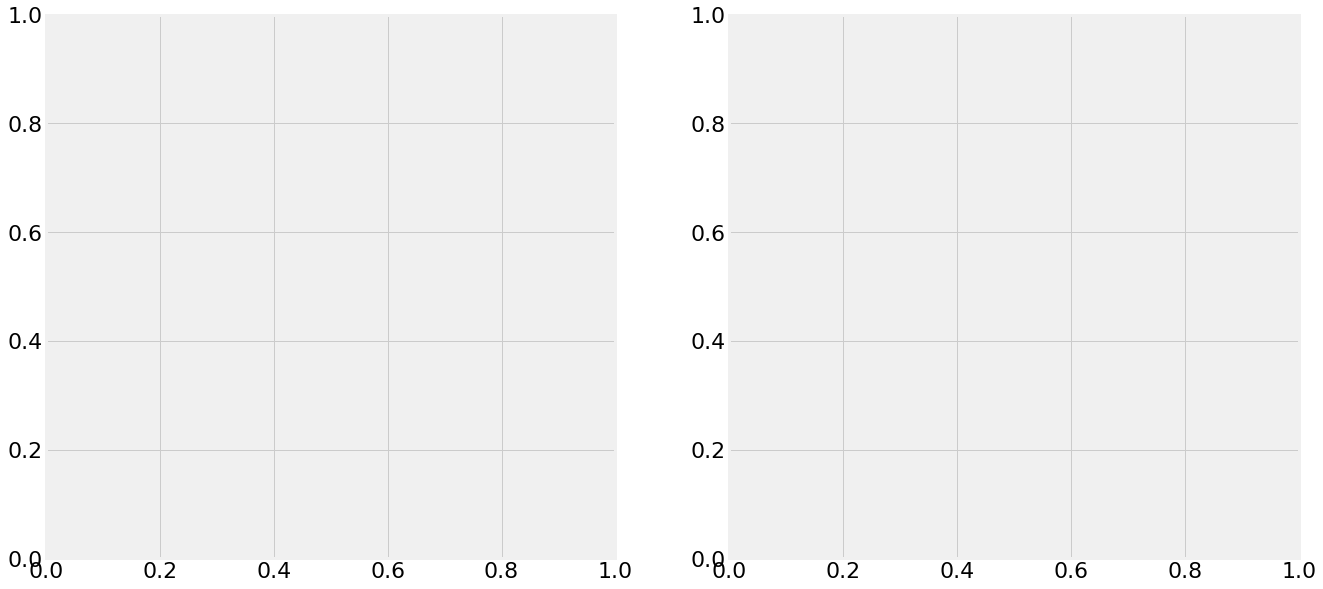

In [92]:
with model:
    pm.traceplot(trace, figsize = (20, 10), priors= pm.Dirichlet('ex', a = np.array([1/3, 1/3, 1/3]), shape = 3), 
             combined = True, lines = mean_dict);

In [87]:
mean_dict

{'posterior_0': 0.46711753957345375,
 'posterior_1': 0.34191265063837395,
 'posterior_2': 0.1909698097881726}

In [58]:
with model:
    samples = pm.sample_ppc(trace, samples = 500, model = model, vars=[observed_data])

sampled = pd.melt(pd.DataFrame(samples['observed_data'], columns = ['Lions', 'Tigers', 'Bears'])).\
            groupby('variable')['value'].\
            value_counts(normalize=True).to_frame().\
             rename(columns = {'value': 'total'}).reset_index()
sampled.head()

100%|██████████| 500/500 [00:00<00:00, 1024.29it/s]


,variable,value,total
0,Bears,0.0,0.416
1,Bears,1.0,0.274
2,Bears,2.0,0.172
3,Bears,3.0,0.094
4,Bears,4.0,0.036


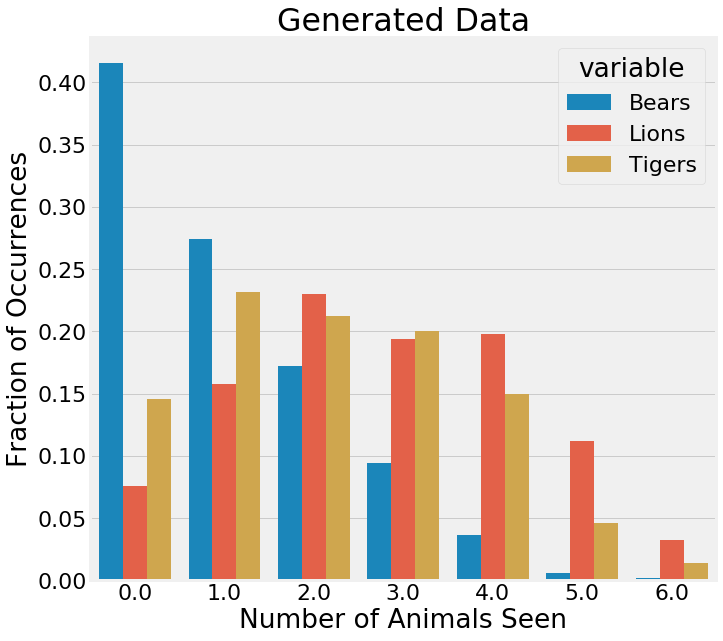

In [61]:
plt.figure( figsize = (10, 10))
sns.barplot(x = 'value', y = 'total',  hue = 'variable', data = sampled);
plt.title('Generated Data'); plt.xlabel('Number of Animals Seen'); plt.ylabel('Fraction of Occurrences');

In [72]:
import numpy as np

next_obs = np.random.multinomial(n = 1, pvals = trace['posterior'].mean(axis = 0), size = 10000)
next_obs = pd.melt(pd.DataFrame(next_obs, columns = ['Lions', 'Tigers', 'Bears'])).\
            groupby('variable')['value'].\
            value_counts(normalize=True).to_frame().\
             rename(columns = {'value': 'total'}).reset_index()
next_obs = next_obs.loc[next_obs['value'] == 1]
next_obs

,variable,value,total
1,Bears,1,0.1957
3,Lions,1,0.4628
5,Tigers,1,0.3415


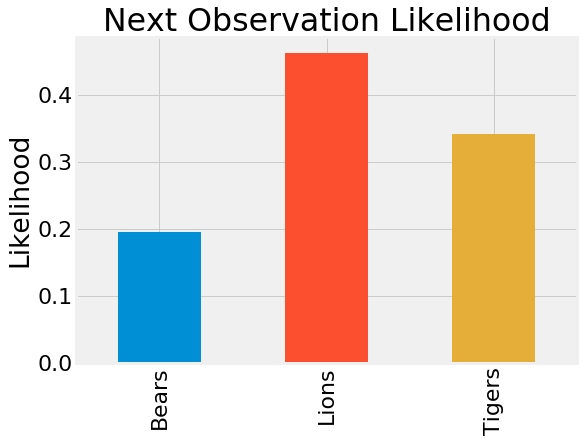

In [75]:
next_obs.set_index('variable')['total'].plot.bar(figsize = (8, 6));
plt.title('Next Observation Likelihood');
plt.ylabel('Likelihood'); plt.xlabel('');

In [66]:
next_obs

,variable,value,total
0,Bears,0,0.8109
1,Bears,1,0.1891
2,Lions,0,0.5321
3,Lions,1,0.4679
4,Tigers,0,0.6570
5,Tigers,1,0.3430


In [ ]:
next_obs = pd.DataFrame()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


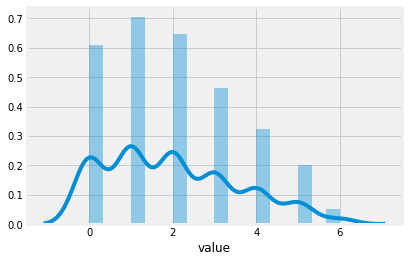

In [18]:
sns.distplot(pd.melt(sampled)['value'], a
            sns.)

In [16]:
pd.wide_to_long(sampleda
               pd.m)

TypeError: wide_to_long() missing 3 required positional arguments: 'stubnames', 'i', and 'j'

KeyboardInterrupt: 

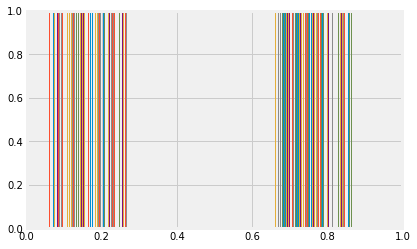

In [11]:


plt.hist(sampled)

In [ ]:
pm.

In [ ]:
trace['posterior'].shape

In [ ]:
trace['posterior'][:, 0].mean()

In [ ]:
trace['posterior'][:, 1].mean()

In [ ]:
trace['posterior'][:, 2].mean()

In [ ]:
10 / 21

In [ ]:
4 / 21

In [ ]:
7 / 21

In [ ]:
trace.varnames

In [ ]:
x

In [ ]:
sample_size = 6
number_of_experiments = 1000

true_probs = [3/6, 2/6, 1/6]
k = len(true_probs)
noise = 0.01
y = np.random.multinomial(n=number_of_experiments, pvals=true_probs, size=sample_size)+noise

with pm.Model() as multinom_test:
    a = pm.Dirichlet('a', a=np.ones(k))
    for i in range(sample_size):
        data_pred = pm.Multinomial('data_pred_%s'% i, n=number_of_experiments, p=a, observed=y[i])
    trace = pm.sample(50000, pm.Metropolis())
    #trace = pm.sample(1000) # also works with NUTS

pm.traceplot(trace[500:]);

In [ ]:
pm.plot_posterior(trace)

In [ ]:
y

In [ ]:
observed = [3, 2, 1]
with pm.Model() as wildlife_preserve:
    prevalence = pm.Dirichlet('prevalence', a=np.ones(len(observed)))
    seen = pm.Multinomial('seen', n=sum(observed), p = prevalence, observed = observed)
    
    sample = pm.sample()

In [ ]:
pm.traceplot(sample)

In [ ]:
import numpy as np
sample_size = 10
number_of_experiments = 100

true_probs = [0.2, 0.1, 0.3, 0.4]
k = len(true_probs)
noise = 0.01
y = np.random.multinomial(n=number_of_experiments, pvals=true_probs, size=sample_size)+noise


In [ ]:
y.shape

In [ ]:
y

In [ ]:
y = np.random.multinomial(n = 6, pvals = [3/6, 2/6, 1/6], size = 1)
y